In [58]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.impute import MissingIndicator, SimpleImputer

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel

# plot_confusion_matrix is a handy visual tool, added in the latest version of scikit-learn
# if you are running an older version, comment out this line and just use confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,recall_score
from sklearn.metrics import plot_roc_curve

In [2]:
features_df = pd.read_csv('data/training_set_features.csv')

In [3]:
labels_df = pd.read_csv('data/training_set_labels.csv')

In [4]:
features_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [5]:
labels_df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [6]:
df = pd.merge(labels_df,features_df,on='respondent_id')

In [7]:
df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [8]:
df.describe()

,respondent_id,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26707.000000,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,0.212454,0.465608,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.409052,0.498825,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,0.000000,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [9]:
df.isnull().sum()

respondent_id                      0
h1n1_vaccine                       0
seasonal_vaccine                   0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
s

In [10]:
df = df.drop(columns=['employment_occupation','employment_industry','health_insurance','respondent_id','h1n1_vaccine',
                 'h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1', 'opinion_h1n1_vacc_effective','opinion_h1n1_risk',
                 'opinion_h1n1_sick_from_vacc'])

In [37]:
df = df.fillna(df.mode().iloc[0])

In [38]:
df.isnull().sum()

seasonal_vaccine               0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_adults               0
household_children             0
dtype: int64

In [39]:
# selecting numeric columns
num_df = df.select_dtypes(exclude='object')

num_df.dtypes

seasonal_vaccine                 int64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
household_adults               float64
household_children             float64
dtype: object

In [40]:
num_df.corr()

,seasonal_vaccine,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
seasonal_vaccine,1.000000,0.006013,0.076130,0.050020,0.112254,0.063722,0.053287,0.119925,0.360696,0.169465,0.013424,0.126977,0.358869,0.386916,-0.057066,-0.065137,-0.111680
behavioral_antiviral_meds,0.006013,1.000000,0.048533,0.145772,0.063996,0.106314,0.127204,0.069982,0.031682,0.004637,0.026183,0.007145,0.014498,0.081503,0.078618,0.044829,0.083090
behavioral_avoidance,0.076130,0.048533,1.000000,0.064155,0.334974,0.225402,0.217599,0.329796,0.070761,0.042054,0.000952,0.002232,0.117356,0.127991,0.084346,0.017995,0.038977
behavioral_face_mask,0.050020,0.145772,0.064155,1.000000,0.083229,0.180377,0.162964,0.103603,0.065301,0.062200,0.036828,0.065645,0.040889,0.105917,0.084084,0.014191,0.004794
behavioral_wash_hands,0.112254,0.063996,0.334974,0.083229,1.000000,0.194750,0.191804,0.362979,0.099317,0.030205,0.035749,0.052930,0.136936,0.170655,0.087218,0.009367,0.047451
behavioral_large_gatherings,0.063722,0.106314,0.225402,0.180377,0.194750,1.000000,0.580881,0.251383,0.087315,0.099621,0.020074,-0.032226,0.078208,0.130800,0.131414,-0.030994,-0.009126
behavioral_outside_home,0.053287,0.127204,0.217599,0.162964,0.191804,0.580881,1.000000,0.265401,0.081252,0.093675,0.016657,-0.035128,0.066861,0.117428,0.133080,-0.026542,-0.008937
behavioral_touch_face,0.119925,0.069982,0.329796,0.103603,0.362979,0.251383,0.265401,1.000000,0.099753,0.029966,0.026506,0.066284,0.104530,0.141537,0.089156,-0.001233,0.023739
doctor_recc_seasonal,0.360696,0.031682,0.070761,0.065301,0.099317,0.087315,0.081252,0.099753,1.000000,0.203121,0.038741,0.058775,0.171801,0.228514,0.028387,-0.031818,-0.042053
chronic_med_condition,0.169465,0.004637,0.042054,0.062200,0.030205,0.099621,0.093675,0.029966,0.203121,1.000000,0.003533,-0.019810,0.093160,0.166381,0.061349,-0.067277,-0.102541


## Train-test splitting

In [41]:
X = num_df.drop(columns='seasonal_vaccine')
y = num_df['seasonal_vaccine']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## 1st Model:  Dummy Classifier

In [43]:
dummy_clf = DummyClassifier(strategy="most_frequent")

In [44]:
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [45]:
dummy_clf.predict(X_train)[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Dummy Model Evaluation

In [46]:
cv_results = cross_val_score(dummy_model, X_train, y_train, cv=10)
cv_results.mean()

0.5308537194208686

### Confusion Matrix

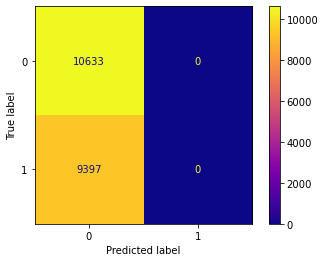

In [47]:
plot_confusion_matrix(dummy_clf, X_train, y_train, cmap="plasma");

In [48]:
confusion_matrix(y_train, dummy_clf.predict(X_train))

array([[10633,     0],
       [ 9397,     0]])

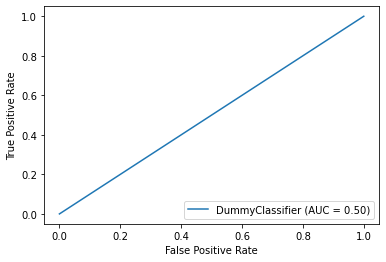

In [49]:
plot_roc_curve(dummy_clf, X_train, y_train);

## 2nd Model: Logistic Regression 

In [50]:
first_logreg_model = LogisticRegression(random_state=1, penalty='none')

In [51]:
first_logreg_model.fit(X_train, y_train)

LogisticRegression(penalty='none', random_state=1)

In [62]:
y_pred = first_logreg_model.predict(X_train)

## 2nd Model Evaluation

In [55]:
cv_logregresults = cross_val_score(first_logreg_model, X_train, y_train, cv=10)

cv_logregresults.mean()

0.752920619071393

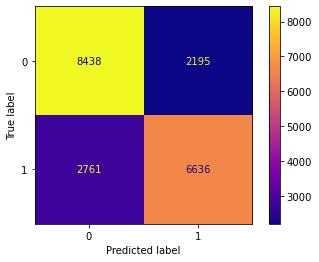

In [56]:
plot_confusion_matrix(first_logreg_model, X_train, y_train, cmap="plasma");

In [57]:
confusion_matrix(y_train, first_logreg_model.predict(X_train))

array([[8438, 2195],
       [2761, 6636]])

In [63]:
precision_score(y_train, y_pred)

0.7514437776016306